### Import libraries 

In [1]:
import pandas as pd 
import numpy as np
import random
import os

In [2]:
SEED = 2021
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Read Data 

In [4]:
train_data = pd.read_csv("train_indessa.csv")

In [5]:
test_data = pd.read_csv("test_indessa.csv")

In [6]:
train_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [7]:
test_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [8]:
train_data.shape

(532428, 45)

In [9]:
test_data.shape

(354951, 44)

### % of null  - Training data 

In [10]:
train_data.isnull().sum()/len(train_data)

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
batch_enrolled                 0.159926
int_rate                       0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.057910
emp_length                     0.050506
home_ownership                 0.000000
annual_inc                     0.000006
verification_status            0.000000
pymnt_plan                     0.000000
desc                           0.858011
purpose                        0.000000
title                          0.000169
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000030
inq_last_6mths                 0.000030
mths_since_last_delinq         0.511908
mths_since_last_record         0.845758


### % of null in test data 

In [11]:
test_data.isnull().sum()/len(test_data)

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
batch_enrolled                 0.128466
int_rate                       0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.058118
emp_length                     0.050525
home_ownership                 0.000000
annual_inc                     0.000003
verification_status            0.000000
pymnt_plan                     0.000000
desc                           0.858626
purpose                        0.000000
title                          0.000175
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000037
inq_last_6mths                 0.000037
mths_since_last_delinq         0.512065
mths_since_last_record         0.845246


### Set member_id as index 

In [12]:
train_data.set_index("member_id", inplace = True)
test_data.set_index("member_id", inplace = True)

### Drop the columns where null is > 75%

In [13]:
thresh = len(train_data) * .75

In [15]:
train_data.dropna(thresh = thresh, axis = 1, inplace = True)

In [16]:
train_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
member_id,,,,,,,,,,,,,,,,,,,,,
58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,...,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,30800.0,0
70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,...,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0,0
70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,...,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0,0
1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,...,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0,0
7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,...,0.0,0.0,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0,0


In [17]:
train_data.title

member_id
58189336         Debt consolidation
70011223           Home improvement
70255675         Debt consolidation
1893936          Debt consolidation
7652106                        refi
                     ...           
31296187         Debt consolidation
29403184         Debt consolidation
7357607          Debt consolidation
23182668    Credit card refinancing
46122259         Debt consolidation
Name: title, Length: 532428, dtype: object

### Drop columns - not usefull and based on corr()

In [18]:
train_data.drop(["loan_amnt", "funded_amnt", "batch_enrolled", "sub_grade", "zip_code"], axis = 1, inplace = True)

In [19]:
train_data.head()

,funded_amnt_inv,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
member_id,,,,,,,,,,,,,,,,,,,,,
58189336,14350.0,36 months,19.19,E,clerk,9 years,OWN,28700.0,Source Verified,n,...,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,30800.0,0
70011223,4800.0,36 months,10.99,B,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,...,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0,0
70255675,10000.0,36 months,7.26,A,Driver,2 years,OWN,45000.0,Not Verified,n,...,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0,0
1893936,15000.0,36 months,19.72,D,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,...,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0,0
7652106,16000.0,36 months,10.64,B,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,...,0.0,0.0,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0,0


In [20]:
train_data.isnull().sum()

funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
emp_title                     30833
emp_length                    26891
home_ownership                    0
annual_inc                        3
verification_status               0
pymnt_plan                        0
purpose                           0
title                            90
addr_state                        0
dti                               0
delinq_2yrs                      16
inq_last_6mths                   16
open_acc                         16
pub_rec                          16
revol_bal                         0
revol_util                      287
total_acc                        16
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
collections_12_mths_ex_med       95
application_type            

In [22]:
train_data["title"].unique()

array(['Debt consolidation', 'Home improvement', 'refi', ...,
       'Relieve Stress', 'Great Credit', 'Loan for Deck'], dtype=object)

In [23]:
train_data["emp_title"].nunique()

190124

### Null Imputation in Train Data 

In [24]:
title_impute = "No_title"
train_data['emp_title'] = train_data['emp_title'].fillna(title_impute)

In [25]:
most_freq = train_data["title"].mode()[0]
train_data['title'] = train_data['title'].fillna(most_freq)

<AxesSubplot:xlabel='count', ylabel='emp_length'>

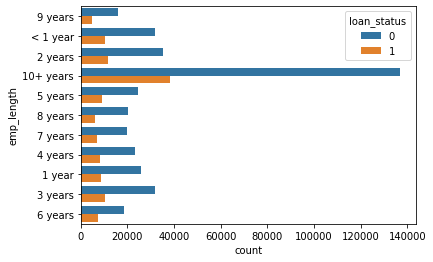

In [26]:
import seaborn as sns
sns.countplot(y = train_data['emp_length'], hue = train_data["loan_status"])

In [27]:
impute_ = "< 1 year"
train_data['emp_length'] = train_data['emp_length'].fillna(impute_)

In [28]:
impute_revol = train_data["revol_util"].median()
train_data['revol_util'] = train_data['revol_util'].fillna(impute_revol)

In [29]:
impute_med = train_data["collections_12_mths_ex_med"].median()
train_data['collections_12_mths_ex_med'] = train_data['collections_12_mths_ex_med'].fillna(impute_med)

In [30]:
impute_tot_coll = train_data["tot_coll_amt"].median()
train_data['tot_coll_amt'] = train_data['tot_coll_amt'].fillna(impute_tot_coll)

In [31]:
impute_tot_cur_bal = train_data["tot_cur_bal"].median()
train_data['tot_cur_bal'] = train_data['tot_cur_bal'].fillna(impute_tot_cur_bal)

In [32]:
impute_total_rev_hi_lim = train_data["total_rev_hi_lim"].median()
train_data['total_rev_hi_lim'] = train_data['total_rev_hi_lim'].fillna(impute_total_rev_hi_lim)

In [33]:
impute_annual_inc = train_data["annual_inc"].median()
train_data['annual_inc'] = train_data['annual_inc'].fillna(impute_annual_inc)

In [34]:
impute_delinq_2yrs = train_data["delinq_2yrs"].median()
train_data['delinq_2yrs'] = train_data['delinq_2yrs'].fillna(impute_delinq_2yrs)

In [35]:
impute_inq_last_6mths = train_data["inq_last_6mths"].median()
train_data['inq_last_6mths'] = train_data['inq_last_6mths'].fillna(impute_inq_last_6mths)

In [36]:
impute_open_acc = train_data["open_acc"].median()
train_data['open_acc'] = train_data['open_acc'].fillna(impute_open_acc)

In [37]:
impute_pub_rec = train_data["pub_rec"].median()
train_data['pub_rec'] = train_data['pub_rec'].fillna(impute_pub_rec)

In [38]:
impute_total_acc = train_data["total_acc"].median()
train_data['total_acc'] = train_data['total_acc'].fillna(impute_total_acc)

In [39]:
impute_acc_now_delinq = train_data["acc_now_delinq"].median()
train_data['acc_now_delinq'] = train_data['acc_now_delinq'].fillna(impute_acc_now_delinq)

### Null Count

In [40]:
train_data.isnull().sum()

funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
last_week_pay                 0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_

### Corr() map in train data 

<AxesSubplot:>

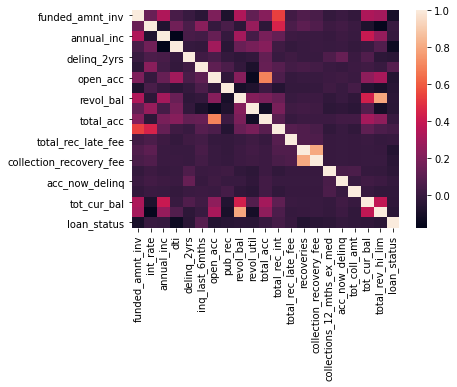

In [41]:
sns.heatmap(train_data.corr())

In [44]:
train_data.columns

Index(['funded_amnt_inv', 'term', 'int_rate', 'grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'application_type', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

### Test set - select columns based on train columns 

In [46]:
test_data = test_data[['funded_amnt_inv', 'term', 'int_rate', 'grade', 'emp_title',
                       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
                       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
                       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                       'total_acc', 'initial_list_status', 'total_rec_int',
                       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                       'collections_12_mths_ex_med', 'application_type', 'last_week_pay',
                       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
                       ]]

In [47]:
test_data.head()

,funded_amnt_inv,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
member_id,,,,,,,,,,,,,,,,,,,,,
11937648,14000.0,60 months,16.24,C,Data Analyst,4 years,RENT,73500.0,Source Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,104th week,0.0,0.0,85230.0,45700.0
38983318,16000.0,60 months,9.49,B,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,57th week,0.0,0.0,444991.0,21400.0
27999917,11050.0,60 months,15.61,D,Customer service representative,10+ years,RENT,62300.0,Not Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,70th week,0.0,0.0,105737.0,16300.0
61514932,34700.0,60 months,12.69,C,ACCT OFFICER,10+ years,OWN,150000.0,Source Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,22th week,0.0,0.0,287022.0,72400.0
59622821,6500.0,36 months,6.89,A,Paralegal,5 years,MORTGAGE,52000.0,Not Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,22th week,0.0,0.0,234278.0,26700.0


### Null count - Test set 

In [48]:
test_data.isnull().sum()

funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
emp_title                     20629
emp_length                    17934
home_ownership                    0
annual_inc                        1
verification_status               0
pymnt_plan                        0
purpose                           0
title                            62
addr_state                        0
dti                               0
delinq_2yrs                      13
inq_last_6mths                   13
open_acc                         13
pub_rec                          13
revol_bal                         0
revol_util                      215
total_acc                        13
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
collections_12_mths_ex_med       50
application_type            

### Null imputation - Same as train imputation 

In [49]:
title_impute = "No_title"
test_data['emp_title'] = test_data['emp_title'].fillna(title_impute)

most_freq = test_data["title"].mode()[0]
test_data['title'] = test_data['title'].fillna(most_freq)

impute_ = "< 1 year"
test_data['emp_length'] = test_data['emp_length'].fillna(impute_)

impute_revol = test_data["revol_util"].median()
test_data['revol_util'] = test_data['revol_util'].fillna(impute_revol)

impute_med = test_data["collections_12_mths_ex_med"].median()
test_data['collections_12_mths_ex_med'] = test_data['collections_12_mths_ex_med'].fillna(impute_med)

impute_tot_coll = test_data["tot_coll_amt"].median()
test_data['tot_coll_amt'] = test_data['tot_coll_amt'].fillna(impute_tot_coll)

impute_tot_cur_bal = test_data["tot_cur_bal"].median()
test_data['tot_cur_bal'] = test_data['tot_cur_bal'].fillna(impute_tot_cur_bal)

impute_total_rev_hi_lim = test_data["total_rev_hi_lim"].median()
test_data['total_rev_hi_lim'] = test_data['total_rev_hi_lim'].fillna(impute_total_rev_hi_lim)

impute_annual_inc = test_data["annual_inc"].median()
test_data['annual_inc'] = test_data['annual_inc'].fillna(impute_annual_inc)

impute_delinq_2yrs = test_data["delinq_2yrs"].median()
test_data['delinq_2yrs'] = test_data['delinq_2yrs'].fillna(impute_delinq_2yrs)

impute_inq_last_6mths = test_data["inq_last_6mths"].median()
test_data['inq_last_6mths'] = test_data['inq_last_6mths'].fillna(impute_inq_last_6mths)

impute_open_acc = test_data["open_acc"].median()
test_data['open_acc'] = test_data['open_acc'].fillna(impute_open_acc)

impute_pub_rec = test_data["pub_rec"].median()
test_data['pub_rec'] = test_data['pub_rec'].fillna(impute_pub_rec)

impute_total_acc = test_data["total_acc"].median()
test_data['total_acc'] = test_data['total_acc'].fillna(impute_total_acc)

impute_acc_now_delinq = test_data["acc_now_delinq"].median()
test_data['acc_now_delinq'] = test_data['acc_now_delinq'].fillna(impute_acc_now_delinq)

### null count on test data 

In [50]:
test_data.isnull().sum()

funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
last_week_pay                 0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_

### Split train data - into train and valid 

In [52]:
_X = train_data.drop('loan_status', axis = 1)
y = train_data[["loan_status"]]

In [58]:
_XTEST = test_data.copy()

In [59]:
_X.shape, _XTEST.shape

((532428, 33), (354951, 33))

### concat training data and testing data 

In [61]:
X_all = pd.concat([_X, _XTEST]).reset_index(drop=True)
X_all.shape

(887379, 33)

In [63]:
X_all.dtypes

funded_amnt_inv               float64
term                           object
int_rate                      float64
grade                          object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
collections_

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

### Select categorical columns  and label encode

In [66]:
cat_columns = []
for col in X_all.select_dtypes('object').columns:
    print(col)
    cat_columns.append(col)
    le = LabelEncoder()
    X_all[col] = le.fit_transform(X_all[col])

term
grade
emp_title
emp_length
home_ownership
verification_status
pymnt_plan
purpose
title
addr_state
initial_list_status
application_type
last_week_pay


### Saprate training and testing data 

In [67]:
X = X_all[:len(y)]
XTEST = X_all[len(y):]
X.shape, XTEST.shape

((532428, 33), (354951, 33))

In [69]:
NUM_OF_BOOST_ROUND = 10000
EARLY_STOPPING = 300

In [70]:
cat_features_index = [i for i,col in enumerate(X.columns) if col in cat_columns]
cat_features_index

[1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 21, 27, 28]

### Split training data into train and validate 

In [71]:
X_train , X_valid, y_train, y_valid = train_test_split(X,y, 
                                                       test_size=0.2, 
                                                       random_state=SEED, 
                                                       stratify=y)

### Parameter tuning 

In [72]:
params = {
    'cat_features': cat_features_index,
    'eval_metric': 'AUC',
    'random_seed': SEED,
    'n_estimators': NUM_OF_BOOST_ROUND,
}

### LGBM Classifier 

In [73]:
clf = lgb.LGBMClassifier(**params)

In [74]:
clf.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, verbose=-1)

[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: eval_metric
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2308]	valid_0's binary_logloss: 0.238179


LGBMClassifier(cat_features=[1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 21, 27, 28],
               eval_metric='AUC', n_estimators=10000, random_seed=2021)

In [75]:
ypred_lgb = clf.predict_proba(X_valid)[:,1]

### roc score - LGBM 

In [76]:
roc_auc_score(y_valid, ypred_lgb)

0.9408762364408235

In [80]:
ytest = clf.predict_proba(XTEST)[:,1]

In [81]:
ytest

array([0.17566374, 0.13817008, 0.06377657, ..., 0.97093671, 0.02299885,
       0.98946176])

In [114]:
t_ = pd.read_csv("test_indessa.csv")
submi = pd.DataFrame()
submi["member_id"] = t_.member_id
submi["loan_status"] = ytest

In [115]:
submi.to_csv('lgbm_submission.csv', index=False)

<AxesSubplot:xlabel='loan_status', ylabel='Density'>

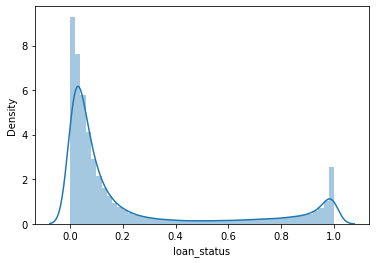

In [116]:
sns.distplot(submi["loan_status"])

### CatBoost Classifier 

### Parameter tune CatBoost Classifier 

In [92]:
params = {
    'cat_features' : cat_features_index,
    'eval_metric': 'AUC',
    'random_seed': SEED,
    'n_estimators': NUM_OF_BOOST_ROUND
}

In [93]:
bst = CatBoostClassifier(**params, early_stopping_rounds=EARLY_STOPPING)
_ = bst.fit(X_train, y_train, eval_set=(X_valid,y_valid), plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [94]:
ypred_cat = bst.predict_proba(X_valid)[:,1]

### Roc auc CatBoost Classifier 

In [95]:
roc_auc_score(y_valid, ypred_cat)

0.9433826219535025

## Feature importance CatBoost Classifier 

In [96]:
f_importance_df = pd.DataFrame(bst.get_feature_importance(), columns=['importance'], index=X_valid.columns)
f_importance_df = f_importance_df.sort_values(by='importance', ascending=False)

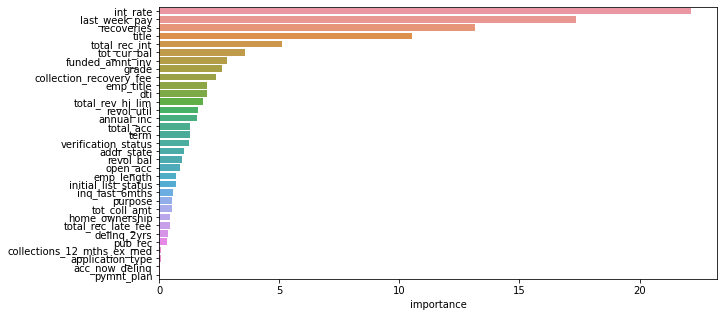

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(x=f_importance_df.importance[:500], y=f_importance_df.index[:500]);

In [100]:
ypred_test = bst.predict_proba(XTEST)[:,1]

### Prob distribution 

<AxesSubplot:ylabel='Density'>

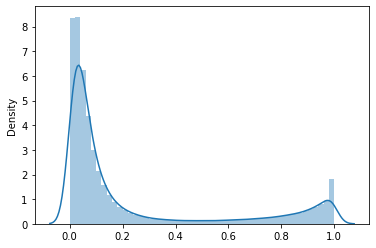

In [102]:
sns.distplot(ypred_test)

In [106]:
t = pd.read_csv("test_indessa.csv")

In [107]:
submission = pd.DataFrame()
submission["member_id"] = t.member_id

In [108]:
submission["loan_status"] = ypred_test

## Saving subumission file 

In [109]:
submission.to_csv('catboost_submission.csv', index=False)

In [110]:
submission

,member_id,loan_status
0,11937648,0.072996
1,38983318,0.063355
2,27999917,0.064273
3,61514932,0.019860
4,59622821,0.038938
...,...,...
354946,19145105,0.044089
354947,46304777,0.534440
354948,903745,0.941245
354949,53032475,0.020939


### Roc Auc Plot comparission LGBM vs CatBOOST 

In [111]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

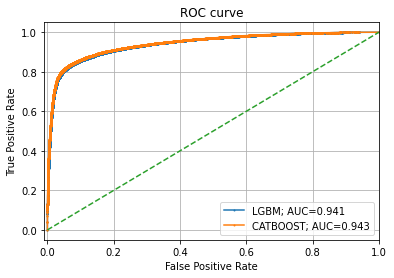

In [112]:
plot_roc(
    [y_valid]*2,
    [ypred_lgb, ypred_cat],
    ['LGBM', 'CATBOOST'])

### Pickle both models weights - 

In [117]:
import pickle
filename = 'LGBM_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [118]:
filename = 'CatBoost_model.sav'
pickle.dump(bst, open(filename, 'wb'))